In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

# 데이터 1차 가공하여 새로운 CSV파일 생성

In [2]:
path ="subway.csv"
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [3]:
data = pd.read_csv(path,encoding='EUC-KR')
data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202006,1호선,종로5가,52,2,1935,4036,2674,16497,5086,...,2288,17,234,0,0,0,0,0,0,20200703
1,202006,1호선,종각,94,3,3286,4443,3385,26566,5367,...,2630,26,131,0,1,0,0,0,0,20200703
2,202006,1호선,동대문,495,8,14049,2376,9668,7451,14530,...,10726,20,920,0,0,2,1,0,0,20200703
3,202006,1호선,신설동,252,6,9370,2462,8823,8751,17577,...,7379,17,546,0,0,0,0,0,0,20200703
4,202006,1호선,제기동,419,7,4701,2355,8346,9047,20972,...,5226,6,408,0,0,0,0,0,0,20200703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,4호선,수유(강북구청),76,1,21160,3652,56906,15248,158768,...,63561,2885,15646,1,0,0,0,0,0,20151223
38086,201501,4호선,미아,12,1,10667,1812,23354,5827,64853,...,21422,705,5150,0,0,0,0,0,0,20151223
38087,201501,4호선,쌍문,38,0,22176,860,56130,10585,149688,...,53418,987,15401,0,0,1,0,0,0,20151223
38088,201501,4호선,상계,34,7,14244,212,42099,8301,106446,...,37194,803,11385,4,913,0,0,0,0,20151223


In [4]:
del data["작업일자"]
data=data.astype({"사용월":str})
data["년도"]=data["사용월"].apply(lambda x:x[0:4])
data["월"]=data["사용월"].apply(lambda x:x[4:])

data=data.drop(data.columns[-6:-2],axis=1)

data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,년도,월
0,202006,1호선,종로5가,52,2,1935,4036,2674,16497,5086,...,19853,3300,6429,2288,17,234,0,0,2020,06
1,202006,1호선,종각,94,3,3286,4443,3385,26566,5367,...,65597,4290,24210,2630,26,131,0,1,2020,06
2,202006,1호선,동대문,495,8,14049,2376,9668,7451,14530,...,11104,10720,4592,10726,20,920,0,0,2020,06
3,202006,1호선,신설동,252,6,9370,2462,8823,8751,17577,...,9959,9767,3493,7379,17,546,0,0,2020,06
4,202006,1호선,제기동,419,7,4701,2355,8346,9047,20972,...,7071,8967,2633,5226,6,408,0,0,2020,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,4호선,수유(강북구청),76,1,21160,3652,56906,15248,158768,...,32483,92088,18423,63561,2885,15646,1,0,2015,01
38086,201501,4호선,미아,12,1,10667,1812,23354,5827,64853,...,10039,32788,4932,21422,705,5150,0,0,2015,01
38087,201501,4호선,쌍문,38,0,22176,860,56130,10585,149688,...,14478,70800,7501,53418,987,15401,0,0,2015,01
38088,201501,4호선,상계,34,7,14244,212,42099,8301,106446,...,14087,45694,5182,37194,803,11385,4,913,2015,01


In [5]:
cols=data.columns.tolist()
cols.remove("년도")
cols.insert(1,"년도")
cols.remove("월")
cols.insert(2,"월")
data=data[cols]

In [6]:
data

,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원
0,202006,2020,06,1호선,종로5가,52,2,1935,4036,2674,...,25803,4553,19853,3300,6429,2288,17,234,0,0
1,202006,2020,06,1호선,종각,94,3,3286,4443,3385,...,83784,6563,65597,4290,24210,2630,26,131,0,1
2,202006,2020,06,1호선,동대문,495,8,14049,2376,9668,...,12670,11315,11104,10720,4592,10726,20,920,0,0
3,202006,2020,06,1호선,신설동,252,6,9370,2462,8823,...,13648,10631,9959,9767,3493,7379,17,546,0,0
4,202006,2020,06,1호선,제기동,419,7,4701,2355,8346,...,8846,9379,7071,8967,2633,5226,6,408,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,01,4호선,수유(강북구청),76,1,21160,3652,56906,...,39513,96293,32483,92088,18423,63561,2885,15646,1,0
38086,201501,2015,01,4호선,미아,12,1,10667,1812,23354,...,16024,33266,10039,32788,4932,21422,705,5150,0,0
38087,201501,2015,01,4호선,쌍문,38,0,22176,860,56130,...,18898,70430,14478,70800,7501,53418,987,15401,0,0
38088,201501,2015,01,4호선,상계,34,7,14244,212,42099,...,14139,45875,14087,45694,5182,37194,803,11385,4,913


In [7]:
for i in range(5,48,2):
    data[str(i)]=data[data.columns[i]]-data[data.columns[i+1]]
data

C:\Users\acorn-508\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,29,31,33,35,37,39,41,43,45,47
0,202006,2020,06,1호선,종로5가,52,2,1935,4036,2674,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,202006,2020,06,1호선,종각,94,3,3286,4443,3385,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,202006,2020,06,1호선,동대문,495,8,14049,2376,9668,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,202006,2020,06,1호선,신설동,252,6,9370,2462,8823,...,10034,17278,34654,5456,3488,3017,192,-3886,-529,0
4,202006,2020,06,1호선,제기동,419,7,4701,2355,8346,...,7477,12893,11270,788,726,-533,-1896,-2593,-402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,01,4호선,수유(강북구청),76,1,21160,3652,56906,...,-11769,-22604,-59129,-103458,-70631,-56780,-59605,-45138,-12761,1
38086,201501,2015,01,4호선,미아,12,1,10667,1812,23354,...,-3298,-5125,-17443,-32873,-21214,-17242,-22749,-16490,-4445,0
38087,201501,2015,01,4호선,쌍문,38,0,22176,860,56130,...,-9209,-20366,-51516,-79471,-59848,-51532,-56322,-45917,-14414,0
38088,201501,2015,01,4호선,상계,34,7,14244,212,42099,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909


In [8]:
count=4
for i in range(5,48,2):
    data=data.rename(columns={str(i):str(count).zfill(2)+"_"+str(count+1).zfill(2)+"시 차이"})
    count=count+1
data

,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,16_17시 차이,17_18시 차이,18_19시 차이,19_20시 차이,20_21시 차이,21_22시 차이,22_23시 차이,23_24시 차이,24_25시 차이,25_26시 차이
0,202006,2020,06,1호선,종로5가,52,2,1935,4036,2674,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,202006,2020,06,1호선,종각,94,3,3286,4443,3385,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,202006,2020,06,1호선,동대문,495,8,14049,2376,9668,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,202006,2020,06,1호선,신설동,252,6,9370,2462,8823,...,10034,17278,34654,5456,3488,3017,192,-3886,-529,0
4,202006,2020,06,1호선,제기동,419,7,4701,2355,8346,...,7477,12893,11270,788,726,-533,-1896,-2593,-402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,01,4호선,수유(강북구청),76,1,21160,3652,56906,...,-11769,-22604,-59129,-103458,-70631,-56780,-59605,-45138,-12761,1
38086,201501,2015,01,4호선,미아,12,1,10667,1812,23354,...,-3298,-5125,-17443,-32873,-21214,-17242,-22749,-16490,-4445,0
38087,201501,2015,01,4호선,쌍문,38,0,22176,860,56130,...,-9209,-20366,-51516,-79471,-59848,-51532,-56322,-45917,-14414,0
38088,201501,2015,01,4호선,상계,34,7,14244,212,42099,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909


In [9]:
data=data.rename(columns={"24_25시 차이":"00_01시 차이","25_26시 차이":"01_02시 차이"})
data

,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,16_17시 차이,17_18시 차이,18_19시 차이,19_20시 차이,20_21시 차이,21_22시 차이,22_23시 차이,23_24시 차이,00_01시 차이,01_02시 차이
0,202006,2020,06,1호선,종로5가,52,2,1935,4036,2674,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,202006,2020,06,1호선,종각,94,3,3286,4443,3385,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,202006,2020,06,1호선,동대문,495,8,14049,2376,9668,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,202006,2020,06,1호선,신설동,252,6,9370,2462,8823,...,10034,17278,34654,5456,3488,3017,192,-3886,-529,0
4,202006,2020,06,1호선,제기동,419,7,4701,2355,8346,...,7477,12893,11270,788,726,-533,-1896,-2593,-402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,01,4호선,수유(강북구청),76,1,21160,3652,56906,...,-11769,-22604,-59129,-103458,-70631,-56780,-59605,-45138,-12761,1
38086,201501,2015,01,4호선,미아,12,1,10667,1812,23354,...,-3298,-5125,-17443,-32873,-21214,-17242,-22749,-16490,-4445,0
38087,201501,2015,01,4호선,쌍문,38,0,22176,860,56130,...,-9209,-20366,-51516,-79471,-59848,-51532,-56322,-45917,-14414,0
38088,201501,2015,01,4호선,상계,34,7,14244,212,42099,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909


In [10]:
data.to_csv("subway_result.csv",encoding="EUC-KR")

# 정리한 CSV 바탕으로 2차 데이터가공

In [11]:
from matplotlib import font_manager #한글을 사용하기 위해 matplotlib패키지 중에서 font_manager패키지를 가져오는 작업

#밑에 그림 참조(윈도우 기준 폰트 저장 장소)
# 여기에 있는 H2GPRM.TTF는 변경 가능함!!! 단, 한글이 되는 폰트로 찾아서 해야함!!!!!
font_fname = 'C:\\Windows\\Fonts\\gulim.ttc' 
font_family = font_manager.FontProperties(fname=font_fname).get_name() #자신이 지정한 폰트를 주피터 노트북에 적용하는 코드

plt.rcParams["font.family"] = font_family

print(font_family)#마지막으로 자신이 정한 코드가 작동되엇는지 확인하기 위해 프린트를 찍어봄

Gulim


In [12]:
path ="subway_result.csv"
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [13]:
data = pd.read_csv(path,encoding='EUC-KR')
#필요없는 행 삭제
del data["Unnamed: 0"]
#지하철역 이름 정리
data["지하철역"]=data["지하철역"].apply(lambda x:x.split("(")[0])

#호선 정리
data["호선명"]=data["호선명"].replace(["경인선","경부선","장항선"],"1호선")
data["호선명"]=data["호선명"].replace("일산선","3호선")
data["호선명"]=data["호선명"].replace(["과천선","안산선"],"4호선")
data["호선명"]=data["호선명"].replace(["9호선2~3단계","9호선2단계"],"9호선")
data

,사용월,년도,월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,...,16_17시 차이,17_18시 차이,18_19시 차이,19_20시 차이,20_21시 차이,21_22시 차이,22_23시 차이,23_24시 차이,00_01시 차이,01_02시 차이
0,202006,2020,6,1호선,종로5가,52,2,1935,4036,2674,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,202006,2020,6,1호선,종각,94,3,3286,4443,3385,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,202006,2020,6,1호선,동대문,495,8,14049,2376,9668,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,202006,2020,6,1호선,신설동,252,6,9370,2462,8823,...,10034,17278,34654,5456,3488,3017,192,-3886,-529,0
4,202006,2020,6,1호선,제기동,419,7,4701,2355,8346,...,7477,12893,11270,788,726,-533,-1896,-2593,-402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,201501,2015,1,4호선,수유,76,1,21160,3652,56906,...,-11769,-22604,-59129,-103458,-70631,-56780,-59605,-45138,-12761,1
38086,201501,2015,1,4호선,미아,12,1,10667,1812,23354,...,-3298,-5125,-17443,-32873,-21214,-17242,-22749,-16490,-4445,0
38087,201501,2015,1,4호선,쌍문,38,0,22176,860,56130,...,-9209,-20366,-51516,-79471,-59848,-51532,-56322,-45917,-14414,0
38088,201501,2015,1,4호선,상계,34,7,14244,212,42099,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909


In [14]:
data2 = pd.read_csv("location.csv",encoding='EUC-KR')
#지하철역 정리
data2["전철역명"]=data2["전철역명"].apply(lambda x: x.split("(")[0])
data2["전철역명"]=data2["전철역명"].apply(lambda x: x.split("?")[0])
#원하는 컬럼만 남기고 drop
data2=data2.drop(["전철역코드","외부코드","사이버스테이션","X좌표","Y좌표","호선"],axis=1)
data2

,전철역명,X좌표(WGS),Y좌표(WGS)
0,가락시장,37.492522,127.118234
1,가락시장,37.492522,127.118234
2,종로3가,37.571607,126.991806
3,종로3가,37.571607,126.991806
4,종로3가,37.571607,126.991806
...,...,...,...
924,동백,37.269043,127.152716
925,초당,37.260752,127.159443
926,삼가,37.242115,127.168075
927,시청,37.239151,127.178406


In [15]:
data=pd.merge(data, data2, how= "left", left_on="지하철역", right_on="전철역명")

In [16]:
#상차인원, 하차인원, 차이인원 별 컬럼 나누기
col_default=data.columns[1:5]
col_on=col_default.append(data.filter(regex="승차").columns)
col_off=col_default.append(data.filter(regex="하차").columns)
col_diff=col_default.append(data.filter(regex="차이").columns)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84316 entries, 0 to 84315
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   사용월           84316 non-null  int64  
 1   년도            84316 non-null  int64  
 2   월             84316 non-null  int64  
 3   호선명           84316 non-null  object 
 4   지하철역          84316 non-null  object 
 5   04시-05시 승차인원  84316 non-null  int64  
 6   04시-05시 하차인원  84316 non-null  int64  
 7   05시-06시 승차인원  84316 non-null  int64  
 8   05시-06시 하차인원  84316 non-null  int64  
 9   06시-07시 승차인원  84316 non-null  int64  
 10  06시-07시 하차인원  84316 non-null  int64  
 11  07시-08시 승차인원  84316 non-null  int64  
 12  07시-08시 하차인원  84316 non-null  int64  
 13  08시-09시 승차인원  84316 non-null  int64  
 14  08시-09시 하차인원  84316 non-null  int64  
 15  09시-10시 승차인원  84316 non-null  int64  
 16  09시-10시 하차인원  84316 non-null  int64  
 17  10시-11시 승차인원  84316 non-null  int64  
 18  10시-11시 하차인원  84316 non-nu

In [18]:
#상차인원, 하차인원, 차이인원 별 테이블만들기
data_on=data[col_on]
data_off=data[col_off]
data_diff=data[col_diff]

In [19]:
#data_on  컬럼 수정('승차인원' 제거)
for i in range(4,len(data_on.columns)):
    data_on.rename(columns={data_on.columns[i]:data_on.columns[i][:-5]},inplace=True)
data_on

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
0,2020,6,1호선,종로5가,52,1935,2674,5086,7527,11391,...,51717,69285,101595,49553,30809,25803,19853,6429,17,0
1,2020,6,1호선,종각,94,3286,3385,5367,8424,10634,...,58818,127045,207821,87619,72988,83784,65597,24210,26,0
2,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
3,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
4,2020,6,1호선,동대문,495,14049,9668,14530,18672,17388,...,22973,24393,23839,16071,13456,12670,11104,4592,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,34,14244,42099,106446,94046,57091,...,28775,30494,29730,21171,15801,14139,14087,5182,803,4
84312,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3
84313,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3
84314,2015,1,4호선,노원,100,11832,30613,64281,73239,45325,...,41374,44279,44203,33758,37979,33479,33300,17968,2873,3


In [20]:
#data_off  컬럼 수정('하차인원' 제거)
for i in range(4,len(data_off.columns)):
    data_off.rename(columns={data_off.columns[i]:data_off.columns[i][:-5]},inplace=True)
data_off

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시
0,2020,6,1호선,종로5가,2,4036,16497,41395,109592,64204,...,27918,25165,23342,13602,6055,4553,3300,2288,234,0
1,2020,6,1호선,종각,3,4443,26566,106806,249411,135873,...,31451,36523,46786,25779,10060,6563,4290,2630,131,1
2,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
3,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
4,2020,6,1호선,동대문,8,2376,7451,13436,25850,23863,...,18298,19074,19307,21241,14320,11315,10720,10726,920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,7,212,8301,9104,22270,20344,...,37665,44644,65398,72982,52842,45875,45694,37194,11385,913
84312,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377
84313,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377
84314,2015,1,4호선,노원,4,654,9336,14674,33083,41572,...,51031,60364,90019,93903,62732,53428,50256,38678,13345,377


In [21]:
#data_diff  컬럼 수정('차이' 제거)
for i in range(4,len(data_diff.columns)):
    data_diff.rename(columns={data_diff.columns[i]:data_diff.columns[i][:-3]},inplace=True)
data_diff

C:\Users\acorn-508\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,년도,월,호선명,지하철역,04_05시,05_06시,06_07시,07_08시,08_09시,09_10시,...,16_17시,17_18시,18_19시,19_20시,20_21시,21_22시,22_23시,23_24시,00_01시,01_02시
0,2020,6,1호선,종로5가,50,-2101,-13823,-36309,-102065,-52813,...,23799,44120,78253,35951,24754,21250,16553,4141,-217,0
1,2020,6,1호선,종각,91,-1157,-23181,-101439,-240987,-125239,...,27367,90522,161035,61840,62928,77221,61307,21580,-105,-1
2,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
3,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
4,2020,6,1호선,동대문,487,11673,2217,1094,-7178,-6475,...,4675,5319,4532,-5170,-864,1355,384,-6134,-900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,2015,1,4호선,상계,27,14032,33798,97342,71776,36747,...,-8890,-14150,-35668,-51811,-37041,-31736,-31607,-32012,-10582,-909
84312,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374
84313,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374
84314,2015,1,4호선,노원,96,11178,21277,49607,40156,3753,...,-9657,-16085,-45816,-60145,-24753,-19949,-16956,-20710,-10472,-374


In [22]:
#data[조건1(연도:2020) &조건2(월:6) &조건3(지하철역:종로5가)]
# x축 깂
data_on[(data_on["년도"]==2020)&(data_on["월"]== 6)& (data_on["지하철역"]=="화곡")].columns[4:]

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시'],
      dtype='object')

In [23]:
data_off[(data_off["년도"]==2020)&(data_off["월"]== 6)& (data_off["지하철역"]=="화곡")].columns[4:]

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시'],
      dtype='object')

In [24]:
data_diff[(data_diff["년도"]==2020)&(data_diff["월"]== 6)& (data_diff["지하철역"]=="화곡")].columns[4:]

Index(['04_05시', '05_06시', '06_07시', '07_08시', '08_09시', '09_10시', '10_11시',
       '11_12시', '12_13시', '13_14시', '14_15시', '15_16시', '16_17시', '17_18시',
       '18_19시', '19_20시', '20_21시', '21_22시', '22_23시', '23_24시', '00_01시',
       '01_02시'],
      dtype='object')

In [25]:
#data[조건1(연도:2020) &조건2(월:6) &조건3(지하철역:종로5가)]
# y축 값
data_on[(data_on["년도"]==2020)& (data_on["월"]== 6)& (data_on["지하철역"]=="화곡")].values[0][4:]

array([82, 20876, 39844, 117120, 142892, 65259, 38367, 32803, 33485,
       31715, 27101, 26724, 30769, 33962, 35461, 21919, 16247, 14000,
       11280, 4137, 6, 0], dtype=object)

# 그래프 그리기

## 1. 시간별 인원현황

연도를 입력하세요(2015~2020): 2016
월을 입력하세요(숫자만 입력): 1
역을 입력하세요(예시/화곡역->화곡): 화곡


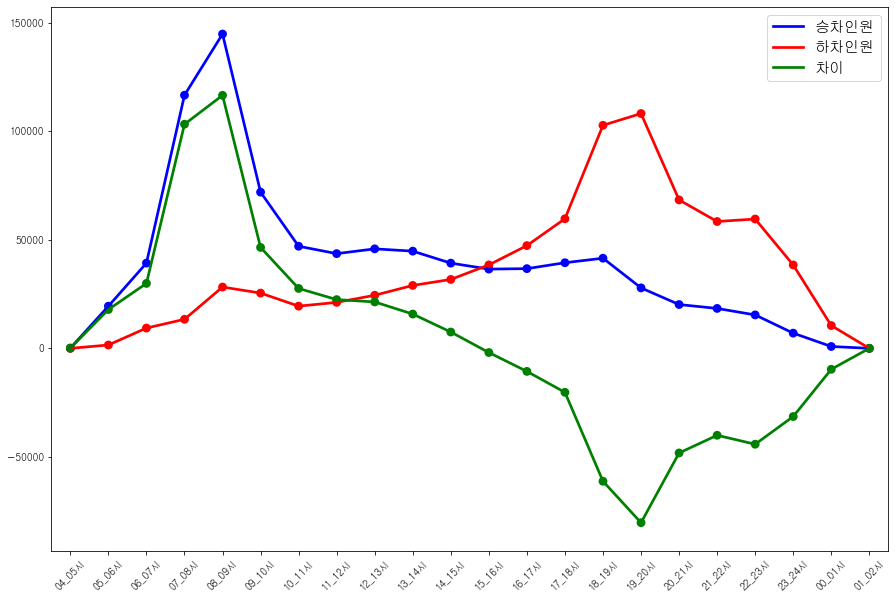

In [26]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))
station=input("역을 입력하세요(예시/화곡역->화곡): ")

# year = 2020
# month = 6
# station = "화곡"

plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')


axes = plt.gca()

sns.pointplot(x=data_on[(data_on["년도"]==year)&(data_on["월"]== month)& (data_on["지하철역"]==station)].columns[4:],
               y=data_on[(data_on["년도"]==year)& (data_on["월"]== month)& (data_on["지하철역"]==station)].values[0][4:],
               color="b",
             ax=axes)
sns.pointplot(x=data_off[(data_off["년도"]==year)&(data_off["월"]== month)& (data_off["지하철역"]==station)].columns[4:],
               y=data_off[(data_off["년도"]==year)& (data_off["월"]== month)& (data_off["지하철역"]==station)].values[0][4:],
                color="r",
             ax=axes)
sns.pointplot(x=data_diff[(data_diff["년도"]==year)&(data_diff["월"]== month)& (data_diff["지하철역"]==station)].columns[4:],
               y=data_diff[(data_diff["년도"]==year)& (data_diff["월"]== month)& (data_diff["지하철역"]==station)].values[0][4:],
                color="g",
             ax=axes)



plt.legend(handles=axes.lines[::23], labels=["승차인원","하차인원","차이"], loc=1, fontsize=15)
# leg = axes.get_legend()
# leg.legendHandles[0].set_color('blue')
# leg.legendHandles[1].set_color('red')
# leg.legendHandles[2].set_color('green')


plt.xticks(rotation=45)
plt.show()

## 2. 호선별 평균 현황 

연도를 입력하세요(2015~2020): 2016
월을 입력하세요(숫자만 입력): 4
호선을 입력하세요(숫자만 입력): 8


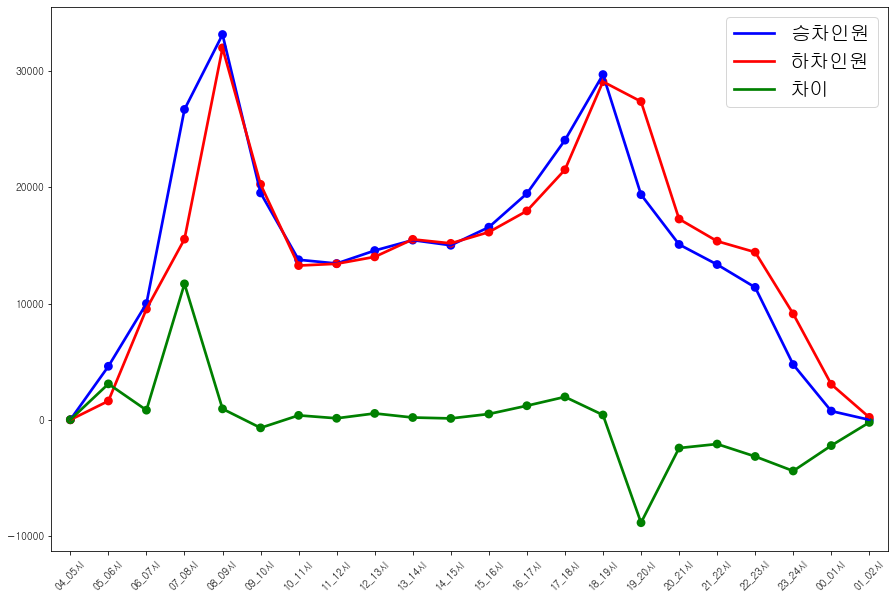

In [27]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))
line=input("호선을 입력하세요(숫자만 입력): ")



plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')

axes = plt.gca()

sns.pointplot(x=data_on[(data_on["호선명"]==line+"호선")&(data_on["년도"]==year)&(data_on["월"]==month)].groupby("호선명")[data_on.columns[4:]].mean().columns,
               y=data_on[(data_on["호선명"]==line+"호선")&(data_on["년도"]==year)&(data_on["월"]==month)].groupby("호선명")[data_on.columns[4:]].mean().values[0],
               color="b")
sns.pointplot(x=data_off[(data_on["호선명"]==line+"호선")&(data_off["년도"]==year)&(data_off["월"]==month)].groupby("호선명")[data_off.columns[4:]].mean().columns,
               y=data_off[(data_off["호선명"]==line+"호선")&(data_off["년도"]==year)&(data_off["월"]==month)].groupby("호선명")[data_off.columns[4:]].mean().values[0],
               color="r")
sns.pointplot(x=data_diff[(data_on["호선명"]==line+"호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]==line+"호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="g")

plt.legend(handles=axes.lines[::23], labels=["승차인원","하차인원","차이"], loc=1, fontsize=20)

plt.xticks(rotation=45)
plt.show()

## 3. 지하철 1~9호선 혼잡도 비교

연도를 입력하세요(2015~2020): 2016
월을 입력하세요(숫자만 입력): 4


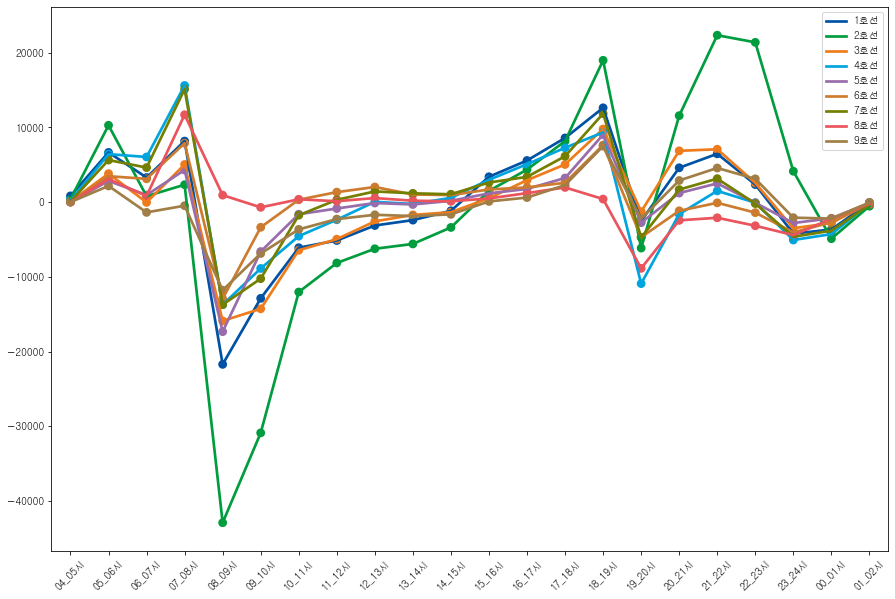

In [28]:
plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')
axes = plt.gca()

year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))

sns.pointplot(x=data_diff[(data_on["호선명"]=="1호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="1호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#0052A4")
sns.pointplot(x=data_diff[(data_on["호선명"]=="2호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="2호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#009D3E")
sns.pointplot(x=data_diff[(data_on["호선명"]=="3호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="3호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#EF7C1C")
sns.pointplot(x=data_diff[(data_on["호선명"]=="4호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="4호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#00A5DE")
sns.pointplot(x=data_diff[(data_on["호선명"]=="5호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="5호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#996CAC")
sns.pointplot(x=data_diff[(data_on["호선명"]=="6호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="6호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#CD7C2F")
sns.pointplot(x=data_diff[(data_on["호선명"]=="7호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="7호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#747F00")
sns.pointplot(x=data_diff[(data_on["호선명"]=="8호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="8호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#EA545D")
sns.pointplot(x=data_diff[(data_on["호선명"]=="9호선")&(data_diff["년도"]==year)&(data_diff["월"]==month)].groupby("호선명")[data_diff.columns[4:]].mean().columns,
               y=data_diff[(data_diff["호선명"]=="9호선")&(data_diff["년도"]==year)&(data_diff["월"]==6)].groupby("호선명")[data_diff.columns[4:]].mean().values[0],
               color="#A17E46")


plt.legend(handles=axes.lines[::23], labels=["1호선","2호선","3호선","4호선","5호선","6호선","7호선","8호선","9호선"], loc=1, fontsize=10)

plt.xticks(rotation=45)
plt.show()

## 4. 시간대별 가장 높은 승차/하차인원 조회 

연도를 입력하세요(2015~2020): 2019
월을 입력하세요(숫자만 입력): 4


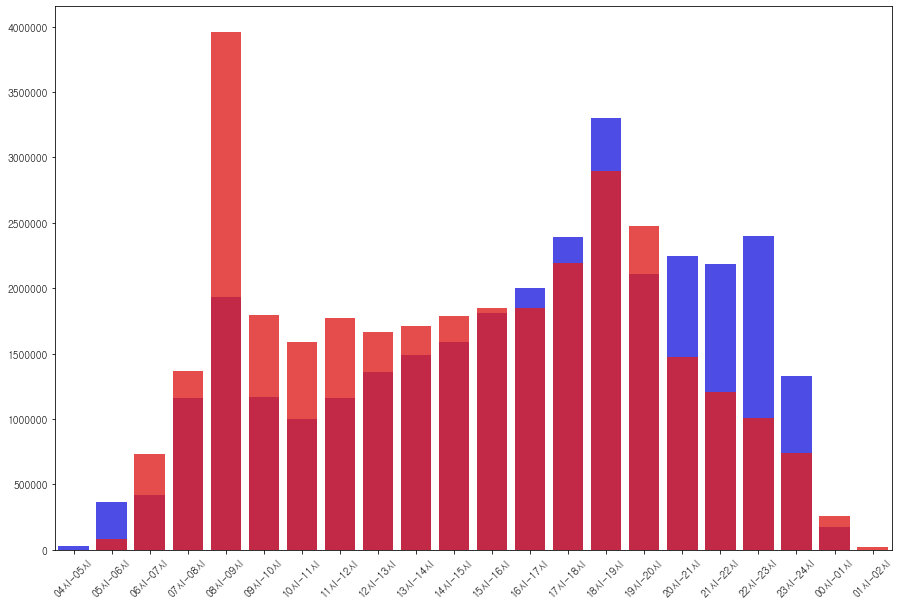

In [29]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))

on_station_sum= data_on[(data_on["년도"]==year)&(data_on["월"]==month)].groupby("지하철역")[data_on.columns[4:]].sum()
time=[]
station=[]
value_max=[]
for i in range(0,len(on_station_sum.max())):
    max_value= on_station_sum.max().values[i]
    for k in on_station_sum.index:
        if on_station_sum.at[k,str(on_station_sum.max().index[i])]==max_value:
            time.append(str(on_station_sum.max().index[i]))
            station.append(k)
            value_max.append(max_value)
#             print(str(on_station_sum.max().index[i]),k,max_value)
#             print(time)
#             print(station)
#             print(value_max)

off_station_sum= data_off[(data_off["년도"]==year)&(data_off["월"]==month)].groupby("지하철역")[data_off.columns[4:]].sum()
off_time=[]
off_station=[]
off_value_max=[]
for i in range(0,len(off_station_sum.max())):
    max_value= off_station_sum.max().values[i]
    for k in off_station_sum.index:
        if off_station_sum.at[k,str(off_station_sum.max().index[i])]==max_value:
            off_time.append(str(off_station_sum.max().index[i]))
            off_station.append(k)
            off_value_max.append(max_value)




plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')


sns.barplot(x=time, y=value_max,color="b",alpha=0.8)
sns.barplot(x=off_time, y=off_value_max,color="r",alpha=0.8)
plt.xticks(rotation=45)

plt.show()

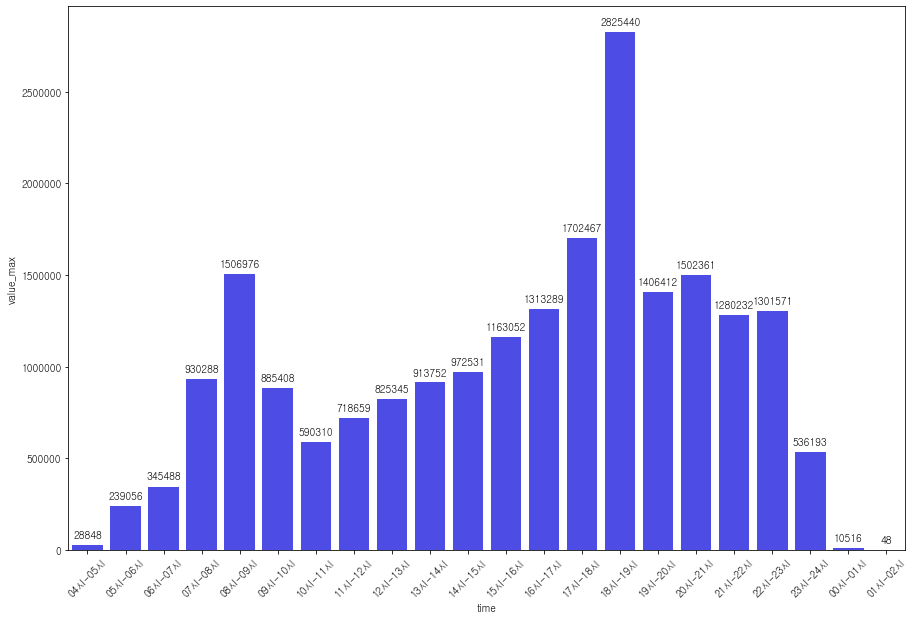

In [37]:
year=2020#int(input("연도를 입력하세요(2015~2020): "))
month=6#int(input("월을 입력하세요(숫자만 입력): "))

on_station_sum= data_on[(data_on["년도"]==year)&(data_on["월"]==month)].groupby("지하철역")[data_on.columns[4:]].sum()
time=[]
station=[]
value_max=[]
for i in range(0,len(on_station_sum.max())):
    max_value= on_station_sum.max().values[i]
    for k in on_station_sum.index:
        if on_station_sum.at[k,str(on_station_sum.max().index[i])]==max_value:
            time.append(str(on_station_sum.max().index[i]))
            station.append(k)
            value_max.append(max_value)
#             print(str(on_station_sum.max().index[i]),k,max_value)
#             print(time)
#             print(station)
#             print(value_max)

temp_DF = pd.DataFrame({"time":time,"station":station,"value_max":value_max})


plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')


ax=sns.barplot(x="time", y="value_max", data=temp_DF, color="b",alpha=0.8)

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x()+p.get_width()/2., p.get_height()), ha='center',
               va='center', xytext=(0,10), textcoords='offset points')

plt.show()

In [31]:
temp_DF

,time,station,value_max
0,04시-05시,부평,28848
1,05시-06시,왕십리,239056
2,06시-07시,왕십리,345488
3,07시-08시,왕십리,930288
4,08시-09시,왕십리,1506976
5,09시-10시,왕십리,885408
6,10시-11시,고속터미널,590310
7,11시-12시,고속터미널,718659
8,12시-13시,고속터미널,825345
9,13시-14시,고속터미널,913752


연도를 입력하세요(2015~2020): 2016
월을 입력하세요(숫자만 입력): 4


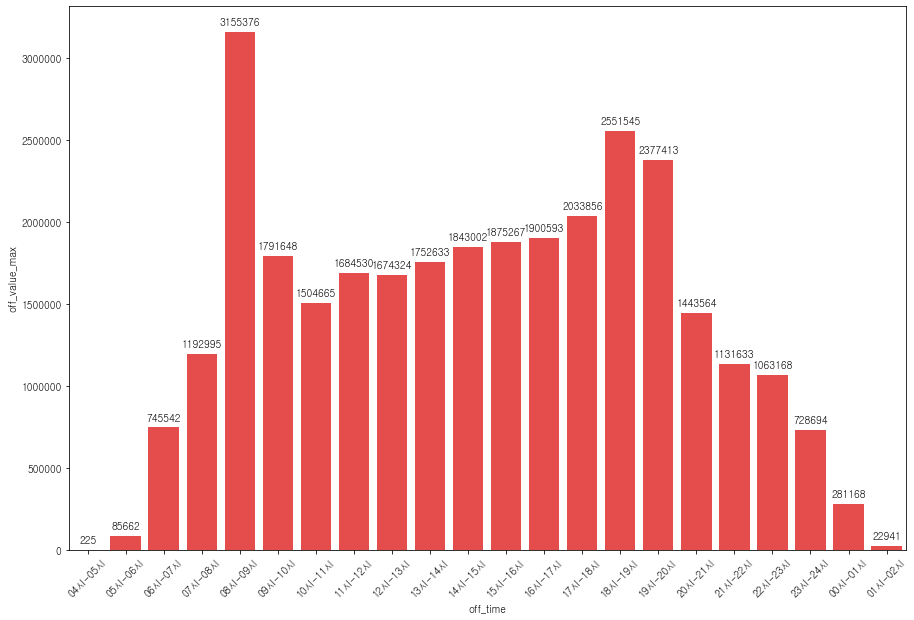

In [38]:
year=int(input("연도를 입력하세요(2015~2020): "))
month=int(input("월을 입력하세요(숫자만 입력): "))

off_station_sum= data_off[(data_off["년도"]==year)&(data_off["월"]==month)].groupby("지하철역")[data_off.columns[4:]].sum()
off_time=[]
off_station=[]
off_value_max=[]
for i in range(0,len(off_station_sum.max())):
    max_value= off_station_sum.max().values[i]
    for k in off_station_sum.index:
        if off_station_sum.at[k,str(off_station_sum.max().index[i])]==max_value:
            off_time.append(str(off_station_sum.max().index[i]))
            off_station.append(k)
            off_value_max.append(max_value)



off_temp_DF = pd.DataFrame({"off_time":off_time,"off_station":off_station,"off_value_max":off_value_max})


plt.figure(figsize=(15,10))
# sns.set(style='whitegrid')


ax=sns.barplot(x="off_time", y="off_value_max", data=off_temp_DF, color="r",alpha=0.8)

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x()+p.get_width()/2., p.get_height()), ha='center',
               va='center', xytext=(0,10), textcoords='offset points')

plt.show()            
            
        

In [39]:
off_temp_DF

,off_time,off_station,off_value_max
0,04시-05시,청량리,225
1,05시-06시,고속터미널,85662
2,06시-07시,고속터미널,745542
3,07시-08시,고속터미널,1192995
4,08시-09시,공덕,3155376
5,09시-10시,고속터미널,1791648
6,10시-11시,고속터미널,1504665
7,11시-12시,고속터미널,1684530
8,12시-13시,고속터미널,1674324
9,13시-14시,고속터미널,1752633
